# Multimodels exercise


In [1]:
%matplotlib inline


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score


In [3]:
WINE_DATA_PATH = "../Jupyter/wine.csv"
WINE_TEST_DATA_PATH = "../Jupyter/wineTestModel.csv"


In [26]:
# Configuration variables
N_NEIGHBORS = 3
K_FOLD = 10
#SCORING_METRICS = ["accuracy", "f1_macro"]
SCORING_METRICS = None


In [27]:
knn = "KNN"
decision_tree = "DecisionTree"
logistic_regression = "LogisticRegression"
svm = "LinearSVM"
bayes = "GaussianBayes"

available_models = {
    knn: KNeighborsClassifier(n_neighbors=N_NEIGHBORS),
    decision_tree: DecisionTreeClassifier(),
    logistic_regression: LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000),
    svm: LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=50000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0),
    bayes: GaussianNB()
}

predictions = {}

model_scores = {}


Plotting Examples: http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot

fig, ax = plt.subplots()
    ax.scatter(training_labels, predicted)
    ax.plot([training_labels.min(), training_labels.max()], [training_labels.min(), training_labels.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    
    plt.show()


In [28]:
data = pd.read_csv(WINE_DATA_PATH, skipinitialspace=True, skip_blank_lines=True)

training_labels = data["cultivar"]

data.drop("cultivar", inplace=True, axis=1)

score_metrics = []

for model_name in available_models.keys():
    model = available_models.get(model_name)
    
    scores = cross_validate(model, data, training_labels, scoring=SCORING_METRICS, cv=K_FOLD)
    
    if not score_metrics:
        score_metrics = list(scores.keys())
    
    model_scores[model_name] = scores


/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/carlosh/Desktop/CHARLIE/ITESM/IntelligentSystems/CODE/int-syst-exam3/int-syst-exam3-venv/lib/python3.7/site-packages/sklearn/svm/base.py:9

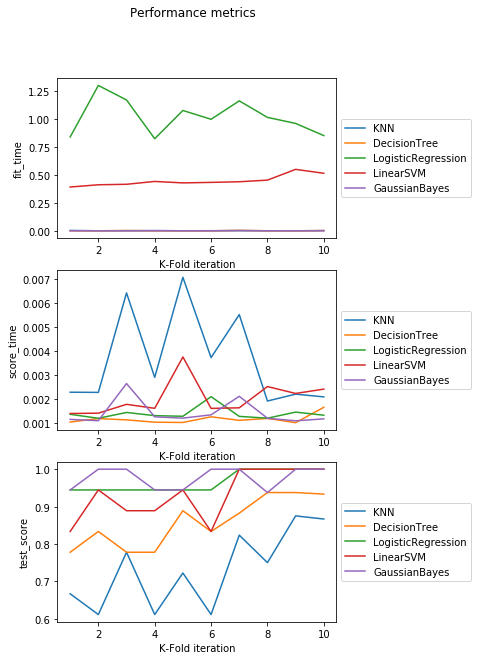

In [29]:
# Prepare the plot to stack vertical subplots
fig, axs = plt.subplots(len(score_metrics))
fig.set_figheight(10)
fig.set_figwidth(5)
fig.suptitle("Performance metrics")

# We will graph fit_time, score_time, test_score

for i in range(len(score_metrics)):
    
    current_subplot = axs[i]
    current_metric = score_metrics[i]
    
    for model_name in available_models.keys():
        
        current_subplot.set_xlabel("K-Fold iteration")
        current_subplot.set_ylabel(current_metric)
        metric_values = model_scores.get(model_name).get(current_metric)
        
        current_subplot.plot(range(1, len(metric_values) + 1),
                 metric_values,
                 label=model_name)
        
        current_subplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



In [30]:
model_scores

{'KNN': {'fit_time': array([0.00538802, 0.00244689, 0.00333905, 0.00391221, 0.00248289,
         0.00302291, 0.00361013, 0.00225806, 0.00216794, 0.00449705]),
  'score_time': array([0.00229478, 0.00228715, 0.006428  , 0.00291276, 0.00707626,
         0.00373507, 0.00552487, 0.00192785, 0.00221395, 0.00210023]),
  'test_score': array([0.66666667, 0.61111111, 0.77777778, 0.61111111, 0.72222222,
         0.61111111, 0.82352941, 0.75      , 0.875     , 0.86666667])},
 'DecisionTree': {'fit_time': array([0.00261974, 0.0023191 , 0.00486517, 0.00220418, 0.002455  ,
         0.00229788, 0.00585794, 0.00278187, 0.00230503, 0.00437498]),
  'score_time': array([0.00105309, 0.00119615, 0.00114393, 0.0010469 , 0.00103521,
         0.00127101, 0.00112486, 0.00120306, 0.00102687, 0.00166702]),
  'test_score': array([0.77777778, 0.83333333, 0.77777778, 0.77777778, 0.88888889,
         0.83333333, 0.88235294, 0.9375    , 0.9375    , 0.93333333])},
 'LogisticRegression': {'fit_time': array([0.83785605, 